# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

# <b><u> Variable Description

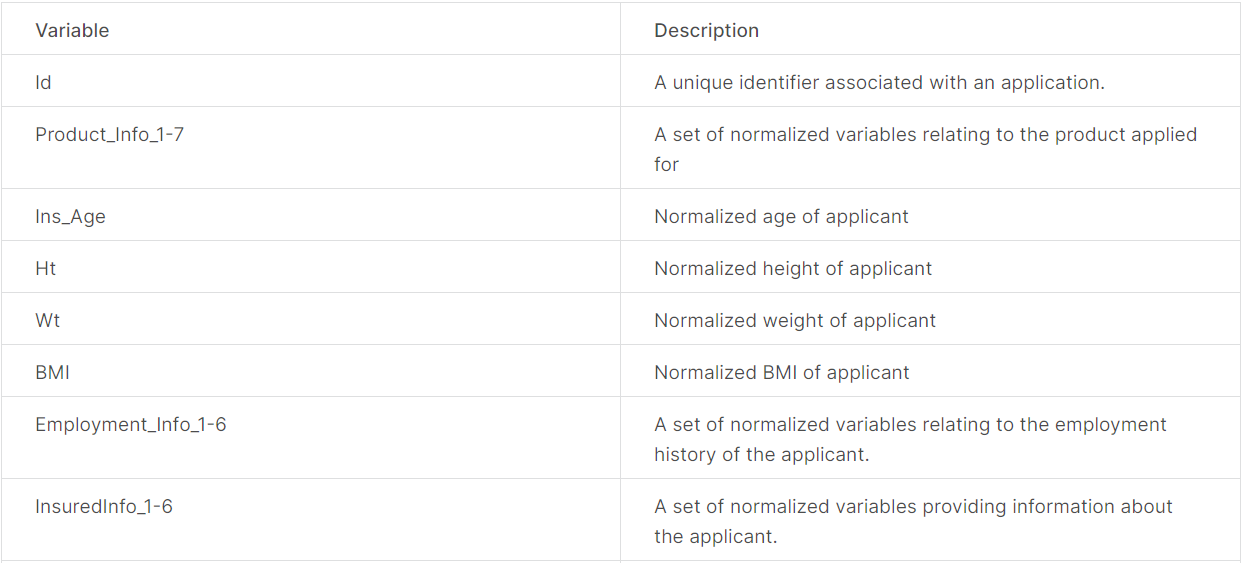

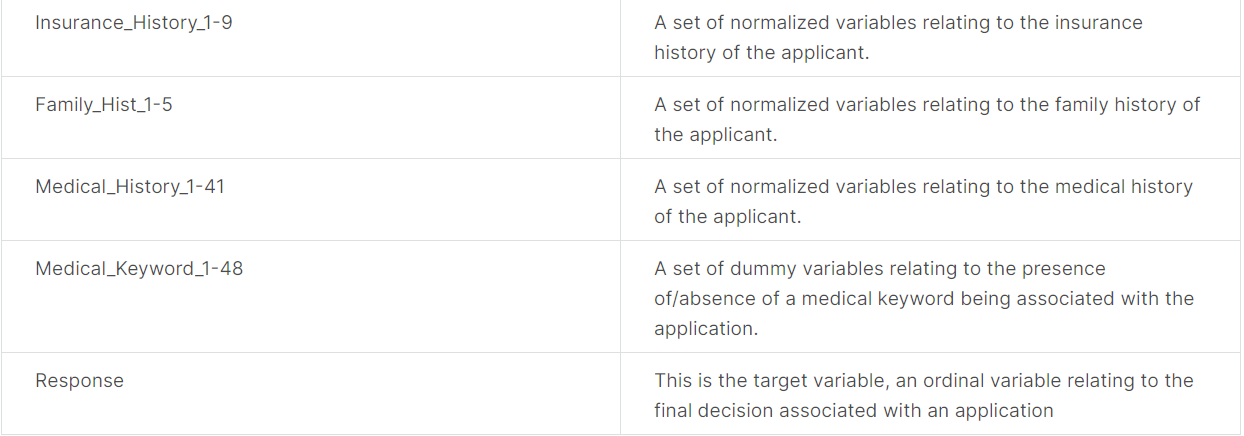

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

# Model interpretability/Explainability: 

suppose a company gives a loan to a customer, so customer went to the site and fill the form or details, that information given to ML model and it calculats in form of YES or No to give a loan or not, customer has right to know why the loan rejected so your ML model should explain this with reason, we use Model reason codes it is nothing but the top variable for which your loan ot rejected(most importnat variable that drive the model-Credit score, low income etc)-PCA feature explainability is difficult.

There is a trade off between model complexity and explainability both goes in opposite way.


# Reading the data

In [4]:
insurance_df=pd.read_csv('train.csv')

In [5]:
insurance_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [6]:
insurance_df.shape

(59381, 128)

In [10]:
#display all columns 
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [11]:
insurance_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [12]:
insurance_df.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

# Exploring the dependent variable

In [13]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [14]:
insurance_df['Response'].isnull().sum()

0

<AxesSubplot:xlabel='Response', ylabel='count'>

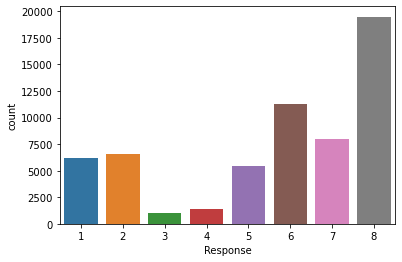

In [15]:
sns.countplot(x=insurance_df['Response'])

# Converting the dependent variable to a binary variable (two possible labels/classes)

In [17]:
def modified_response(row):
    if (row['Response']<=7) and (row['Response']>=0):
        val =0
    elif row['Response']==8:
        val=1
    else:
        val=-1
    return val

In [18]:
insurance_df['Modified_Response']=insurance_df.apply(modified_response,axis=1)

In [19]:
insurance_df['Modified_Response'].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

<AxesSubplot:xlabel='Modified_Response', ylabel='count'>

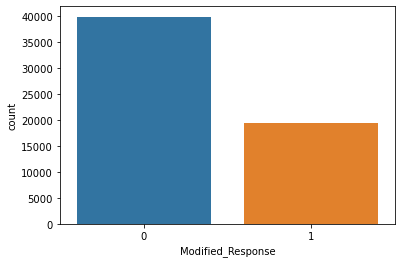

In [20]:
sns.countplot(x= insurance_df['Modified_Response'])

In [21]:
insurance_df.drop('Response',axis=1,inplace=True)

In [22]:
insurance_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
insurance_df['Medical_Keyword_17'].value_counts()

0    58837
1      544
Name: Medical_Keyword_17, dtype: int64

In [24]:
insurance_df['Medical_Keyword_48'].value_counts()

0    56145
1     3236
Name: Medical_Keyword_48, dtype: int64

In [25]:
insurance_df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462

In [27]:
isn=insurance_df.isnull().sum()
print(isn.to_string())

Id                         0
Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
Insurance_History_7        0
Insurance_History_8        0
Insurance_History_9        0
Family_Hist_1              0
Family_Hist_2 

In [31]:
insurance_df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
 #    Column               Dtype  
---   ------               -----  
 0    Id                   int64  
 1    Product_Info_1       int64  
 2    Product_Info_2       object 
 3    Product_Info_3       int64  
 4    Product_Info_4       float64
 5    Product_Info_5       int64  
 6    Product_Info_6       int64  
 7    Product_Info_7       int64  
 8    Ins_Age              float64
 9    Ht                   float64
 10   Wt                   float64
 11   BMI                  float64
 12   Employment_Info_1    float64
 13   Employment_Info_2    int64  
 14   Employment_Info_3    int64  
 15   Employment_Info_4    float64
 16   Employment_Info_5    int64  
 17   Employment_Info_6    float64
 18   InsuredInfo_1        int64  
 19   InsuredInfo_2        int64  
 20   InsuredInfo_3        int64  
 21   InsuredInfo_4        int64  
 22   InsuredInfo_5        int64  
 23   InsuredIn

In [34]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
insurance_df.corr()
#Random forest handles corelation in a better way so we dont need to worry

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Id,1.000000,-0.002870,-0.001869,-0.002914,-0.004195,0.005038,0.002117,0.001764,0.003674,0.005648,0.004287,0.004870,0.003494,-0.001986,-0.002587,-0.001187,-0.002757,-0.000660,-0.000933,-0.005334,-0.002146,-0.007252,-0.002743,-0.000444,-0.006076,-0.003174,-0.002030,0.001276,0.004509,0.002302,-0.008474,0.002351,-0.002500,0.000407,-0.000212,0.003485,-0.004986,-0.001933,0.004283,-0.002067,-0.005608,-0.003288,0.000827,-0.001361,0.000862,-0.001634,-0.024296,-0.001332,0.001968,0.005322,0.003230,0.004400,0.006966,0.003515,-0.001006,-0.006387,-0.002382,0.001453,-0.000628,-0.002670,0.010954,-0.001966,0.001777,0.002828,0.007766,-0.005196,0.001359,-0.000690,0.019470,-0.001345,0.001048,-0.000738,-0.001563,0.000479,0.006912,0.000295,-0.000707,0.001859,0.002301,0.005587,-0.000141,-0.001086,-0.005182,-0.004651,0.006552,0.001802,-0.003378,-0.003543,-0.000816,0.000755,0.001964,-0.005224,0.000908,0.002525,-0.011247,0.007796,-0.002923,-0.001628,0.000345,0.000395,0.001289,0.002848,0.009106,-0.000812,-0.001669,-0.007184,-0.000063,-0.005972,0.004306,0.005827,0.002889,-0.001369,-0.005707,-0.000728,0.000900,-0.002561,0.006539,-0.001746,0.005721,-0.004575,-0.007633,0.001917,-0.000286,0.002684,0.001199,-0.001122,-0.004526
Product_Info_1,-0.002870,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,-0.037130,0.047371,0.032271,-0.039832,0.008507,-0.018840,0.011871,-0.041654,0.002911,0.002709,-0.047523,0.013376,-0.047975,0.011357,0.013058,0.007242,-0.008187,0.015076,0.010613,0.006753,0.012547,0.008191,-0.001294,-0.054089,-0.017769,-0.056415,-0.013988,0.022124,0.005200,-0.017654,-0.022528,0.005489,0.008830,-0.000740,-0.002164,0.002007,-0.155339,-0.001493,-0.004357,0.007037,0.003845,-0.030431,0.006451,0.004598,0.001497,-0.009154,0.0

# Dropping the columns with more than 40% null values

In [38]:
miss=insurance_df.isnull().sum()/len(insurance_df)

In [43]:
print(miss[miss>0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [46]:
insurance_df=insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)

In [47]:
insurance_df.shape


(59381, 123)

In [48]:
list(insurance_df.columns)

['Id',
 'Product_Info_1',
 'Product_Info_2',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_Hist

In [49]:
insurance_df['Product_Info_2'].head(20)

0     D3
1     A1
2     E1
3     D4
4     D2
5     D2
6     A8
7     D2
8     D3
9     E1
10    D3
11    D4
12    A2
13    D1
14    D4
15    A7
16    D4
17    D3
18    D3
19    D4
Name: Product_Info_2, dtype: object

In [50]:
insurance_df['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

# Dropping the categorical variable since it has a lot of categories

In [51]:
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# <b>Start building baseline models (Random Forest Classifier & XGBoost Classifier)

In [54]:
# Data for all the independent variables
x=insurance_df.drop('Modified_Response',axis=1)

# Data for the dependent variable
y = insurance_df['Modified_Response']

In [55]:
x.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Modified_Response, dtype: int64

In [59]:
x=x.fillna(x.mean())

In [61]:
x.shape, y.shape

((59381, 121), (59381,))

# Splitting the data into train and test

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [64]:
x_train.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_2          0
Family_Hist_3          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0


# Training a Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Provide the range of values for chosen hyperparameters

In [69]:
# Number of trees
n_estimators=[50,80,100]
# Maximum depth of trees
max_depth=[4,6,8]
# Minimum number of samples required to split a node
min_samples_split=[50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf=[40,50]

param_dict={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [70]:
param_dict
##total model 3C1*3C1*3C1*2C1=54

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [72]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

In [73]:
# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

In [74]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.0s
[CV] END max_depth=4, min_sam

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   5.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   5.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   5.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   5.2s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   5.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   6.3s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   6.2s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   6.2s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   6.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   9.2s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   9.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   9.3s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   9.2s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   4.9s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   4.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   4.8s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   4.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   4.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   6.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   6.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   6.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=  10.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=  10.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   9.9s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=  10.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=  10.0s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=  12.4s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=10

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [76]:
rf_optimal_model=rf_grid.best_estimator_

In [77]:
rf_optimal_model

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=150,
                       n_estimators=80)

In [79]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 80}

In [80]:
train_class_preds=rf_optimal_model.predict(x_train)
test_class_preds=rf_optimal_model.predict(x_test)

In [81]:
train_class_preds

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [82]:
test_class_preds

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [87]:
train_preds=rf_optimal_model.predict_proba(x_train)[:,1]
test_preds=rf_optimal_model.predict_proba(x_test)

In [88]:
train_preds

array([0.57007149, 0.0820973 , 0.39425271, ..., 0.19860356, 0.61915896,
       0.68374809])

In [93]:
rf_optimal_model.predict_proba(x_train)

array([[0.42992851, 0.57007149],
       [0.9179027 , 0.0820973 ],
       [0.60574729, 0.39425271],
       ...,
       [0.80139644, 0.19860356],
       [0.38084104, 0.61915896],
       [0.31625191, 0.68374809]])

In [114]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,roc_curve

In [96]:
# Calculating accuracy on train and test
train_accuracy=accuracy_score(y_train,train_class_preds)
test_accuracy=accuracy_score(y_test,test_class_preds)
print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8114965757269563
The accuracy on test dataset is 0.8043243971440118


In [99]:
# Get the confusion matrices for train and test
train_cm=confusion_matrix(y_train,train_class_preds)
test_cm=confusion_matrix(y_test,test_class_preds)
train_cm

array([[27215,  2692],
       [ 5703,  8925]], dtype=int64)

In [100]:
test_cm

array([[9058,  927],
       [1978, 2883]], dtype=int64)

In [103]:
print(classification_report(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     29907
           1       0.77      0.61      0.68     14628

    accuracy                           0.81     44535
   macro avg       0.80      0.76      0.77     44535
weighted avg       0.81      0.81      0.81     44535



In [104]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      9985
           1       0.76      0.59      0.66      4861

    accuracy                           0.80     14846
   macro avg       0.79      0.75      0.76     14846
weighted avg       0.80      0.80      0.80     14846



In [106]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

ValueError: y should be a 1d array, got an array of shape (14846, 2) instead.

In [107]:
train_auc

0.8932971344793873

In [110]:
test_auc

ValueError: y should be a 1d array, got an array of shape (14846, 2) instead.

In [119]:
importances=rf_optimal_model.feature_importances_

In [115]:
fpr,tpr,th=roc_curve(y_train,train_preds)

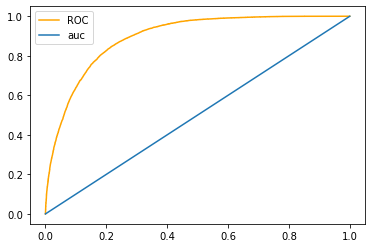

In [117]:
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1], [0,1],label='auc')
plt.legend()

In [118]:
!pip install shap

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [121]:
importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [122]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [123]:
importance_df.head()

,Feature,Feature Importance
0,Id,0.00
1,Product_Info_1,0.00
2,Product_Info_3,0.00
3,Product_Info_4,0.03
4,Product_Info_5,0.00


In [124]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
10,BMI,0.25
9,Wt,0.17
56,Medical_History_23,0.12
39,Medical_History_4,0.11
87,Medical_Keyword_15,0.08
22,InsuredInfo_6,0.04
3,Product_Info_4,0.03
7,Ins_Age,0.03
33,Family_Hist_2,0.02
35,Family_Hist_4,0.02


In [126]:
import shap
shap.initjs()

In [127]:
x_shap=x_train
explainer=shap.TreeExplainer(rf_optimal_model)
shap_values=explainer.shap_values(x_shap)

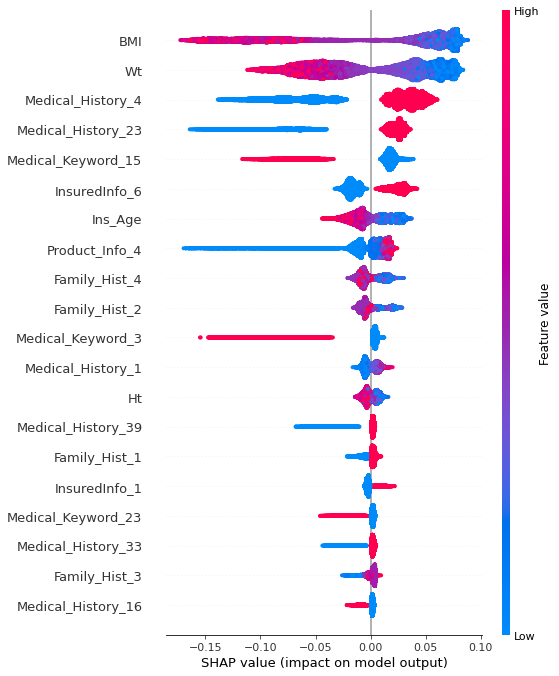

In [129]:
#Summary plot
shap.summary_plot(shap_values[1],x_shap,plot_type="dot")

In [ ]:
#shap for test
x_shap1=x_test
explainer=shap.TreeExplainer(rf_optimal_model)
shap_values1=explainer.shap_values(x_shap1)
shap.summary_plot(shap_values1[1],x_shap,plot_type="dot")

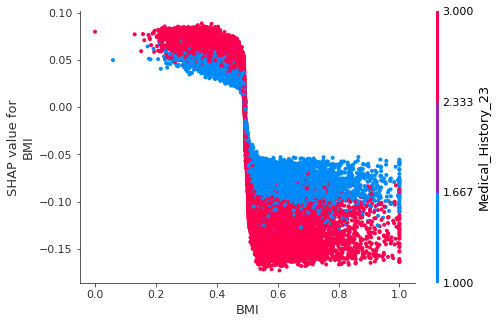

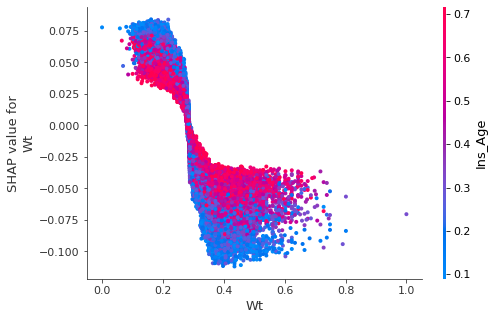

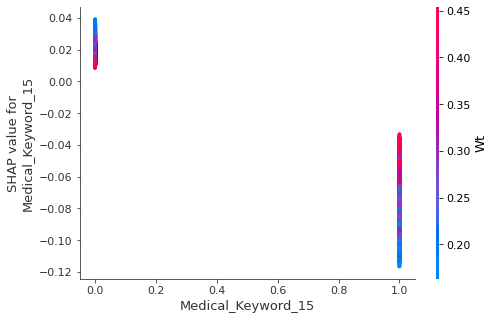

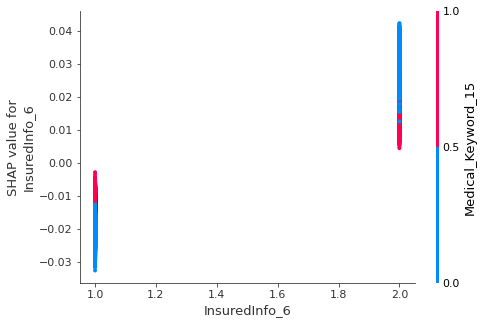

In [132]:
#Dependance plot
top_vars=['BMI','Wt','Medical_Keyword_15','InsuredInfo_6']
for i in top_vars:
    shap.dependence_plot(i,shap_values[1],x_train)

In [133]:
#Explore shap documentation for force plot 

# Pickle the file for model deployement

In [154]:
import pickle

In [155]:
model=pickle.dump(rf_optimal_model,open('s','wb'))

In [136]:
pckl=pickle.load(open('insurance.pkl','rb'))

In [151]:
pred=pckl.predict(np.array([list(x_train.loc[0])]))

In [153]:
pred[0]

0